# Productos Financieros

Alan Cardenas  27/abril/2020

Este proyecto esta dedicado a realizar una comparacion de los rendimientos en el ultimo año de fondos de inversíon, acciones, indices y algunos rendimientos de proyectos en la industria fintech.

Tambien se incluira un modelo predictivo para analizar el comportamiento del S&P 500.

![tittle](Images/risk2.jpg)

### **Paqueterias y herramientas**

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import yfinance as yf

**Databases**

Indices

In [3]:
ipc_mes = pd.read_csv('IPC_mensual.csv')
ipc_dia = pd.read_csv('IPC_diario.csv')
sp500_mes = pd.read_csv('S&P500_mensual.csv')
sp500_dia = pd.read_csv('S&P500_diario.csv')

Fondos de inversion y fintech

In [4]:
bbva = pd.read_csv('bbva_mensual.csv')
hsbc = pd.read_csv('hsbc_mensual.csv')
maya = pd.read_csv('maya_mensual.csv')
rvtec = pd.read_csv('rvtec_mensual.csv')
latin9 = pd.read_csv('latin9_mensual.csv')
fondos_rend = pd.read_csv('fondos_rend.csv')
fintech_rend= pd.read_csv('fintech_rend.csv')

FAANG

In [5]:
faang_rend= pd.read_csv('faang_rend.csv')

## Comparativos

In [6]:
def grafobarra(axs, caracteristica_x, caracteristica_y):
    columnas = fondos_rend.columns
    print("Plotteando: "+columnas[caracteristica_x]+"(X) vs "+columnas[caracteristica_y]+"(Y)")

    graff = axs.bar(fondos_rend.iloc[:,caracteristica_x],fondos_rend.iloc[:,caracteristica_y],label = 'rendimientos',
            color=['orange', 'red', 'green', 'pink', 'blue','black'])
    
    bar_label = fondos_rend.iloc[:,caracteristica_y]
    for idx,rect in enumerate(graff):
        height = rect.get_height()
        axs.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=0,color='purple')
    
    
    axs.set_xlabel(columnas[caracteristica_x])
    axs.set_ylabel(columnas[caracteristica_y])

### IPC vs Fondos de inversion.

![tittle](Images/fondos.jfif)

Plotteando: Fondos(X) vs rend_feb(Y)
Plotteando: Fondos(X) vs rend_abril(Y)


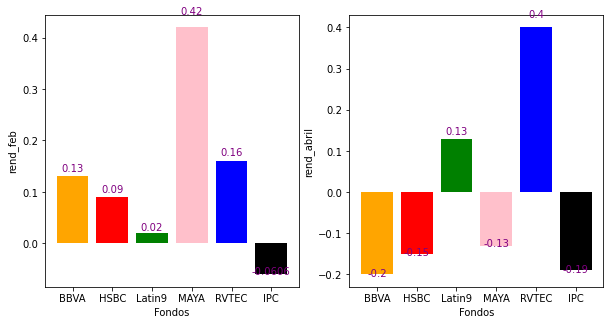

In [7]:
fig, axs = plt.subplots(1, 2,figsize=(10,5))

caracteristica_x = 0
caracteristica_y = 1
grafobarra(axs[0],caracteristica_x, caracteristica_y)

caracteristica_x = 0
caracteristica_y = 2
grafobarra(axs[1],caracteristica_x, caracteristica_y)

Funcion para calcular variacion en rendimientos

In [8]:
def porcentajes(array):
    cambio = [0]
    for num in range(len(array) - 1):
        cambio.append(round((array[num + 1] / array[num])-1,4))
    cambio[0] = np.nanmean(cambio)
    return cambio

Agregar variacion a todos los DF.

In [9]:
bbva['var%'] = porcentajes(bbva['Cierre'])
hsbc['var%'] = porcentajes(hsbc['Cierre'])
maya['var%'] = porcentajes(maya['Cierre'])
rvtec['var%'] = porcentajes(rvtec['Cierre'])
latin9['var%'] = porcentajes(latin9['Cierre'])

**Estadisticos basicos**

In [10]:
def datos_estadisticos(array):
    result1= np.where(array == min(array.loc[:,'var%']))
    result2= np.where(array == max(array.loc[:,'var%']))
    print("rendimiento minimo: "+ str(min(array.loc[:,'var%'])*100)+' %'+' fecha:'+ array.iloc[result1[0][0],0])
    print("rendimiento maximo: "+ str(max(array.loc[:,'var%'])*100)+' %'+' fecha:'+ array.iloc[result2[0][0],0])
    print("rendimiento promedio: "+ str(np.mean(array.loc[:,'var%'])*100)+' %')  
        

In [11]:
datos_estadisticos(bbva)

rendimiento minimo: -22.78 % fecha:01/03/2020
rendimiento maximo: 3.6999999999999997 % fecha:01/08/2019
rendimiento promedio: -2.0646999999999998 %


In [12]:
datos_estadisticos(hsbc)

rendimiento minimo: -19.28 % fecha:01/03/2020
rendimiento maximo: 3.29 % fecha:01/09/2019
rendimiento promedio: -1.4508999999999999 %


In [13]:
datos_estadisticos(maya)

rendimiento minimo: -19.42 % fecha:01/03/2020
rendimiento maximo: 3.08 % fecha:01/08/2019
rendimiento promedio: -1.2859 %


In [14]:
datos_estadisticos(rvtec)

rendimiento minimo: -3.5999999999999996 % fecha:01/02/2020
rendimiento maximo: 19.759999999999998 % fecha:01/04/2020
rendimiento promedio: 4.0007 %


In [15]:
datos_estadisticos(latin9)

rendimiento minimo: -3.8 % fecha:01/02/2020
rendimiento maximo: 10.51 % fecha:01/04/2020
rendimiento promedio: 1.4113 %


### IPC vs Fintechs

![tittle](Images/fintech.jpg)

                  Rendimientos a febrero


Text(0, 0.5, 'rendimientos')

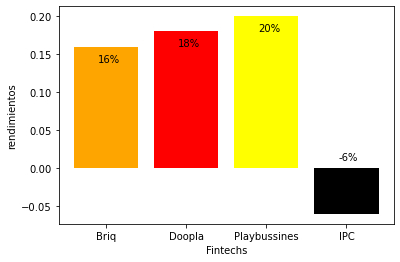

In [16]:
figsize=(10,5)
print("                  Rendimientos a febrero")


plt.bar(fintech_rend.iloc[:,0],fintech_rend.iloc[:,1],label = 'rendimientos a enero',color=['orange', 'red', 'yellow','black'])
plt.text(x = -0.1,y= 0.14, s= '16%')
plt.text(x = 0.9,y= 0.16, s= '18%')
plt.text(x = 1.9,y= 0.18, s= '20%')
plt.text(x = 2.9,y= 0.01, s= '-6%')
plt.xlabel('Fintechs')
plt.ylabel('rendimientos')

### Indices vs acciones(FAANG)

![tittle](Images/stock.jpg)

In [17]:
def autolabel1(rects):
    for idx,rect in enumerate(rects):
        height = rect.get_height()
        ax1.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=0,color='red')
def autolabel2(rects):
    for idx,rect in enumerate(rects):
        height = rect.get_height()
        ax2.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=0,color='red')

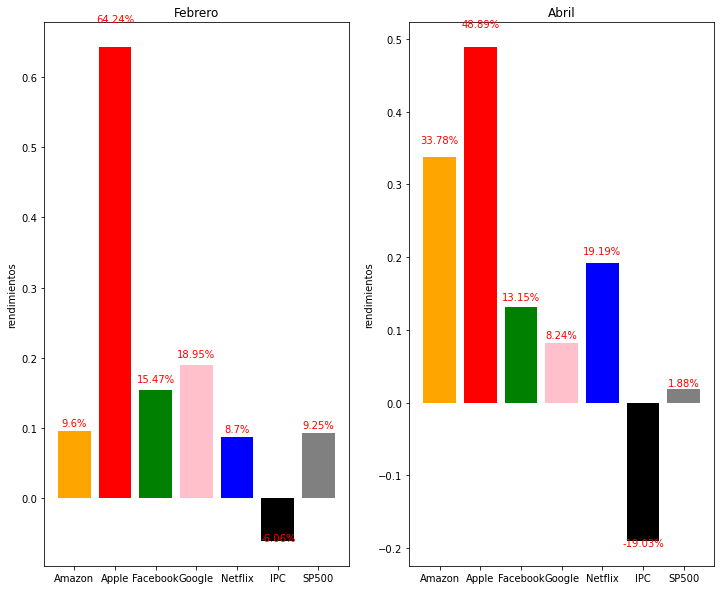

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,10))

graf1 = ax1.bar(faang_rend.iloc[:,0],faang_rend.iloc[:,1],label = 'rendimientos a febrero',
                color=['orange', 'red', 'green', 'pink', 'blue','black','gray'])
ax1.set_title('Febrero')
ax1.set_ylabel('rendimientos')


graf2 = ax2.bar(faang_rend.iloc[:,0],faang_rend.iloc[:,2],label = 'rendimientos a abril',
                color=['orange', 'red', 'green', 'pink', 'blue','black','gray'])
ax2.set_title('Abril')
ax2.set_ylabel('rendimientos')

bar_label=['9.6%','64.24%','15.47%','18.95%','8.7%','-6.06%','9.25%']
autolabel1(graf1)
bar_label=['33.78%','48.89%','13.15%','8.24%','19.19%','-19.03%','1.88%']
autolabel2(graf2)

#### Evolucíon de los rendimientos mensuales

In [19]:
def bolsainfo(stock_simbol):
    tickerData = yf.Ticker(stock_simbol)
    dfname = tickerData.history(period='1mo',interval='1mo', start='2019-04-1', end='2020-04-01')
    dfname = dfname.filter(['Close'])
    dfname = dfname.reset_index()
    dfname['var%'] = porcentajes(dfname['Close'])
    return dfname

In [20]:
amazon = bolsainfo('AMZN')
apple = bolsainfo('AAPL')
facebook = bolsainfo('FB')
google = bolsainfo('GOOG')
netflix = bolsainfo('NFLX')
sp500 = bolsainfo('^GSPC')
ipc = bolsainfo('^MXX')

amazon

,Date,Close,var%
0,2019-04-01,1926.52,0.018677
1,2019-05-01,1775.07,-0.078600
2,2019-06-01,1893.63,0.066800
3,2019-07-01,1866.78,-0.014200
4,2019-08-01,1776.29,-0.048500
5,2019-09-01,1735.91,-0.022700
6,2019-10-01,1776.66,0.023500
7,2019-11-01,1800.80,0.013600
8,2019-12-01,1847.84,0.026100
9,2020-01-01,2008.72,0.087100


In [21]:
apple = apple.drop([2, 6,10,14])
apple = apple.reindex()

#### Estadisticos

In [22]:
def datos_estadisticos2(array):
    result1= np.where(array == min(array.loc[:,'var%']))
    result2= np.where(array == max(array.loc[:,'var%']))
    result3= np.where(array == min(array.loc[:,'Close']))
    result4= np.where(array == max(array.loc[:,'Close']))
    print("rendimiento minimo:   "+ str(min(array.loc[:,'var%'])*100)+' %'+' fecha:'+ str(array.iloc[result1[0][0],0]))
    print("rendimiento maximo:   "+ str(max(array.loc[:,'var%'])*100)+' %'+' fecha:'+ str(array.iloc[result2[0][0],0]))
    print("rendimiento promedio: "+ str(np.mean(array.loc[:,'var%'])*100)+' %')
    print("precio minimo:   "+ str(min(array.loc[:,'Close']))+' fecha:'+ str(array.iloc[result3[0][0],0]))
    print("precio maximo:   "+ str(max(array.loc[:,'Close']))+' fecha:'+ str(array.iloc[result4[0][0],0]))
    print("precio promedio: "+ str(np.mean(array.loc[:,'Close'])))

In [23]:
datos_estadisticos2(amazon)

rendimiento minimo:   -7.86 % fecha:2019-05-01 00:00:00
rendimiento maximo:   21.69 % fecha:2020-04-01 00:00:00
rendimiento promedio: 2.011360946745562 %
precio minimo:   1735.91 fecha:2019-09-01 00:00:00
precio maximo:   2372.71 fecha:2020-04-01 00:00:00
precio promedio: 1893.4153846153847


#### Graficos

In [24]:
def grafosimple(axnum,empresa,titulo,columna):
    """ex:(ax1,apple,'Apple',2) columna:1=precio,2=rendimiento"""
    axnum.plot(empresa.iloc[:,0],empresa.iloc[:,columna],color = 'r')
    axnum.set_xlabel('fecha')
    axnum.set_ylabel('Rendimiento' if columna == 2 else 'Precio')
    axnum.set_title(titulo)

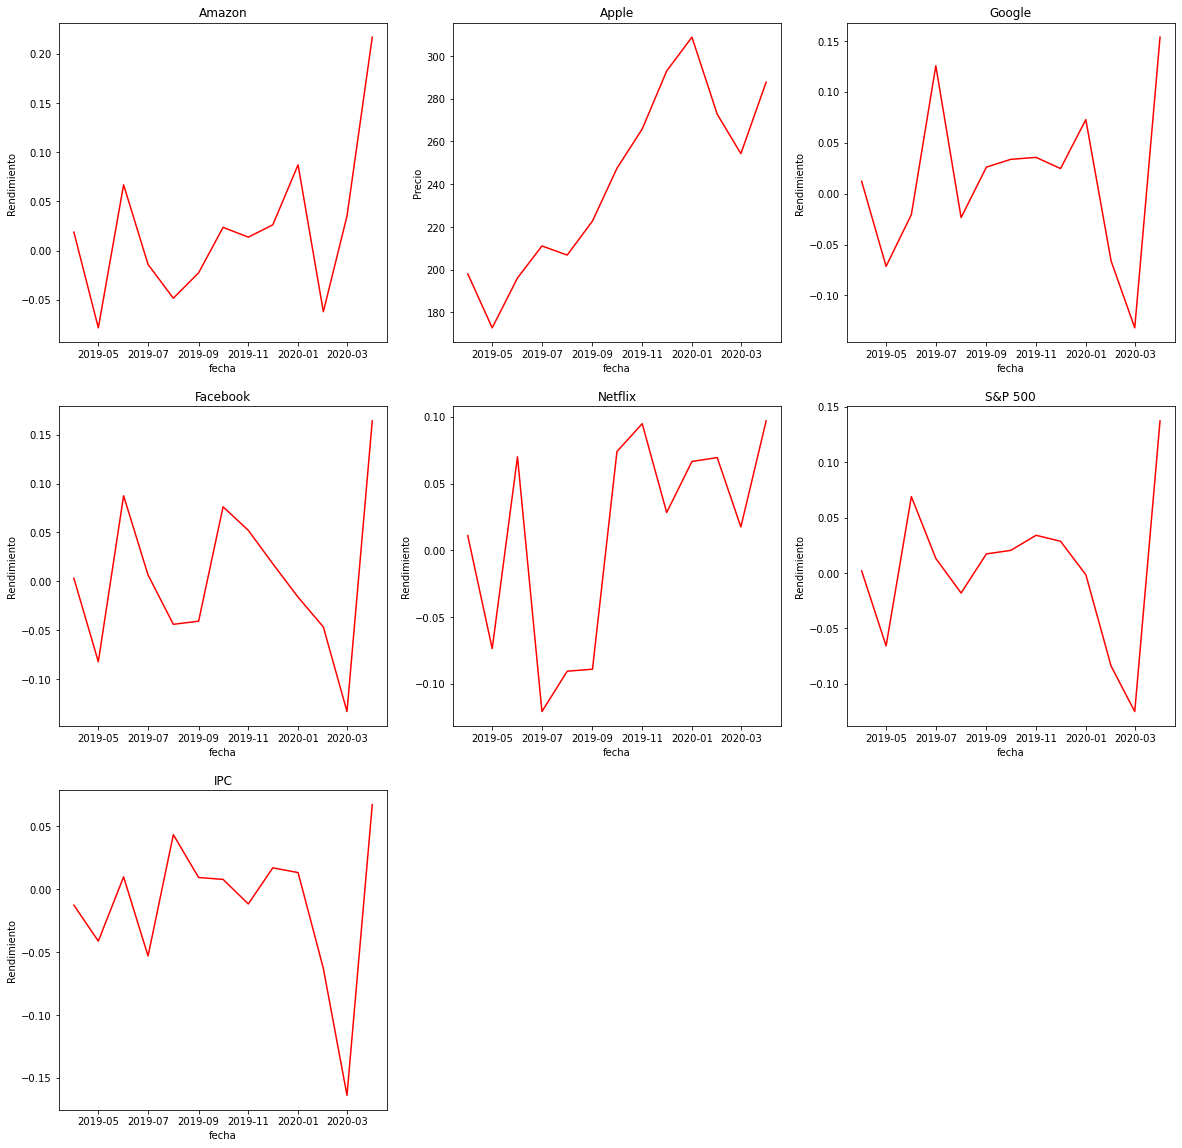

In [25]:
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)

grafosimple(ax1,amazon,'Amazon',2)
grafosimple(ax2,apple,'Apple',1)
grafosimple(ax3,google,'Google',2)
grafosimple(ax4,facebook,'Facebook',2)
grafosimple(ax5,netflix,'Netflix',2)
grafosimple(ax6,sp500,'S&P 500',2)
grafosimple(ax7,ipc,'IPC',2)

## Forecast

![tittle](Images/forecast.jpg)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [27]:
tickerSymbol = '^GSPC'
tickerData = yf.Ticker(tickerSymbol)
sp500_close = tickerData.history(period='1mo',interval='1mo', start='1970-04-1', end='2020-04-01')[['Close']] #‘1d’ (daily), ‘1mo’ (monthly), ‘1y’ (yearly)
sp500_close.reset_index(drop = True,inplace = True)
sp500_close

,Close
0,81.52
1,76.55
2,72.72
3,78.05
4,81.52
...,...
596,3230.78
597,3225.52
598,2954.22
599,2584.59


In [28]:
n_prediction = 1 # periodos por predecir

In [29]:
sp500_close['predict'] = sp500_close['Close'].shift(-n_prediction)
sp500_close.tail(5)

,Close,predict
596,3230.78,3225.52
597,3225.52,2954.22
598,2954.22,2584.59
599,2584.59,2939.51
600,2939.51,NaN


In [30]:
sp500_close.shape

(601, 2)

**separar en numpy arrays las variables y remover filas equivalentes a 'n_prediction'**

In [31]:
x = np.array(sp500_close.drop(['predict'],1))
x = x[:-n_prediction]
x.shape #lista de listas

(600, 1)

In [32]:
y = np.array(sp500_close['predict'])
y = y[:-n_prediction]
y.shape #lista simple

(600,)

**separar variables para entrenamiento y prueba (80%)**

In [33]:
x_entrenamiento,x_prueba,y_entrenamiento,y_prueba = train_test_split(x,y, test_size = 0.2)

### crear y entrenar modelo SVR

In [34]:
svr_model = SVR(kernel = 'rbf', C = 1e3, gamma = 0.1,)
svr_model.fit(x_entrenamiento,y_entrenamiento)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

**porcentaje de confianza del modelo**

In [35]:
svr_model.score(x_prueba,y_prueba)

0.6647526820010685

**Prediccion y graficas**

In [36]:
svr_predict = svr_model.predict(x[585:])
svr_predict

array([2740.32337825, 2102.39212449, 2102.40559767, 2294.07648403,
       1102.39212449, 2293.19984605, 2368.20571591, 2102.39229669,
       2368.20571591, 2102.39212449, 1102.39212449, 2165.25748339,
       2165.25748339, 2103.2691244 , 2096.32738831])

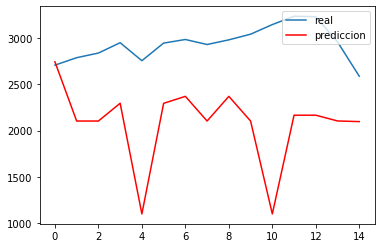

In [37]:
plt.plot(x[-15:],label= 'real')
plt.plot(svr_predict,c='r',label= 'prediccion')
plt.legend(loc='upper right')

### crear y entrenar modelo Regresion lineal

In [38]:
rl_model = LinearRegression()
rl_model.fit(x_entrenamiento,y_entrenamiento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**porcentaje de confianza del modelo**

In [39]:
rl_model.score(x_prueba,y_prueba)

0.994155520931002

In [40]:
rl_predict = svr_model.predict(x[-60:])

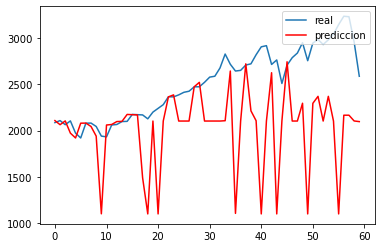

In [41]:
plt.plot(x[-60:],label= 'real')
plt.plot(rl_predict,c='r',label= 'prediccion')
plt.legend(loc='upper right')